# United Nations General Assembly Resolutions
## LDA Topic Modeling

In [17]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from gensim import corpora
import gensim
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pickle
from gensim.models import CoherenceModel


dirname=os.path.dirname

ROOT_DIR = os.path.join('..', '..')
INIT_DATA_PATH = os.path.join(ROOT_DIR, 'data', 'initial')
INTER_DATA_PATH = os.path.join(ROOT_DIR, 'data', 'inter')
FINAL_DATA_PATH = os.path.join(ROOT_DIR, 'data', 'final')
ERROR_LOG = os.path.join(ROOT_DIR, 'error-logs')
OUTPUT_PATH = os.path.join(ROOT_DIR, 'output', 'topic-modeling')

plt.style.use("seaborn-dark")
plt.rcParams['figure.dpi'] = 75
plt.rcParams['savefig.dpi'] = 300

### Load Data

In [2]:
tokens = pd.read_json(os.path.join(FINAL_DATA_PATH, 'unga_tokens.json'))

### Load the Topic Models
Topic models were created by the script `topic_modeling.py`

In [8]:
with open(os.path.join(OUTPUT_PATH, 'lda-models', 'corpus'), 'rb') as f: 
    corpus = pickle.load(f)

with open(os.path.join(OUTPUT_PATH, 'lda-models', 'id2word'), 'rb') as f: 
    id2word = pickle.load(f)

n_topics = [6, 8, 10, 12, 14, 16, 18, 20]
lda_models = {}
for n_topic in n_topics:
    with open(os.path.join(OUTPUT_PATH, 'lda-models', f'lda-model-{n_topic}'), 'rb') as f: 
        lda_models[n_topic] = pickle.load(f)

### Compute Model Metrics

In [10]:
# computing metrics for all models take about 35-40 minutes
compute_metrics = False

# Compute Perplexity and Coherence Scores for each model or load them
if compute_metrics:
    ppls = []
    coherences = []
    for n_topic in n_topics: 
        ppls.append(lda_models[n_topic].log_perplexity(corpus))
        coherence_model = CoherenceModel(model=lda_models[n_topic], texts=tokens['tokens'], dictionary=id2word, coherence='c_v')
        coherences.append(coherence_model.get_coherence())

    metrics = pd.DataFrame({'Number of Topics': n_topics, 'Log Perplexity': ppls, 'Coherence Score': coherences})
    metrics.to_csv(os.path.join(OUTPUT_PATH, 'model_metrics.csv'), index=False)

else: 
    metrics = pd.read_csv(os.path.join(OUTPUT_PATH, 'model_metrics.csv'))

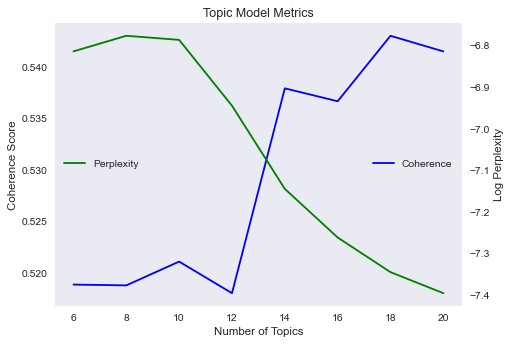

In [48]:
plt.figure(figsize = (7,5))
sns.lineplot(x = 'Number of Topics', y = 'Coherence Score', data = metrics, color='b')
plt.legend(labels=["Coherence"], loc='center right')

ax2 = plt.twinx()
sns.lineplot(x = 'Number of Topics', y = 'Log Perplexity', data = metrics, color='g', ax=ax2).set(title='Topic Model Metrics')
plt.legend(labels=["Perplexity"], loc='center left')
plt.savefig(os.path.join(OUTPUT_PATH, 'model_metrics.png'))

### Analyzing the Topic Model

Pick the topic model with 14 topics for easier interpretation, and relatively high coherence as well as low perplexity.

In [81]:
lda_model = lda_models[14]
lda_model.show_topics(num_topics=14, num_words=20)

[(0,
  '0.097*"right" + 0.072*"human" + 0.013*"freedom" + 0.012*"declaration" + 0.011*"cultural" + 0.010*"promotion" + 0.010*"social" + 0.009*"fundamental" + 0.009*"respect" + 0.009*"people" + 0.009*"protection" + 0.008*"political" + 0.008*"economic" + 0.007*"principle" + 0.007*"peace" + 0.007*"national" + 0.007*"universal" + 0.007*"reaffirm" + 0.007*"promote" + 0.006*"covenant"'),
 (1,
  '0.037*"woman" + 0.033*"child" + 0.014*"discrimination" + 0.014*"social" + 0.013*"person" + 0.013*"education" + 0.011*"right" + 0.011*"action" + 0.011*"world" + 0.011*"health" + 0.010*"form" + 0.010*"violence" + 0.009*"ensure" + 0.009*"racial" + 0.008*"girl" + 0.008*"youth" + 0.007*"organization" + 0.007*"national" + 0.007*"gender" + 0.007*"program"'),
 (2,
  '0.036*"disarmament" + 0.035*"nuclear" + 0.028*"weapon" + 0.019*"treaty" + 0.016*"conference" + 0.014*"security" + 0.013*"arm" + 0.010*"use" + 0.009*"peace" + 0.008*"party" + 0.008*"measure" + 0.006*"negotiation" + 0.006*"agreement" + 0.006*"revi

In [49]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_models[14], corpus, id2word)
vis

/Users/egemenpamukcu/Desktop/course-materials/thesis/unga-resolutions/env/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/egemenpamukcu/Desktop/course-materials/thesis/unga-resolutions/env/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/egemenpamukcu/Desktop/course-materials/thesis/unga-resolutions/env/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/egemenpamukcu/Desktop/course-materials/thesis/unga-resolutions/env/lib/python3.9/site-packages/past/builtins/misc.py:45: Dep

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12    -0.129971 -0.072556       1        1  14.064542
11     0.005008 -0.011446       2        1  12.378209
2     -0.044970 -0.009847       3        1   8.957359
6      0.154627  0.024459       4        1   8.407984
5     -0.033688  0.114285       5        1   7.605693
0     -0.099810  0.103706       6        1   6.717272
7     -0.005544  0.117636       7        1   6.495540
9     -0.151496 -0.109649       8        1   5.829034
1     -0.150879  0.018433       9        1   5.828953
3      0.214782 -0.139069      10        1   5.746112
10     0.000144  0.201403      11        1   5.486342
13    -0.071138 -0.105837      12        1   4.789172
8     -0.055401 -0.137302      13        1   4.494939
4      0.368336  0.005782      14        1   3.198850, topic_info=               Term           Freq          Total Category  logprob  loglift
107           right  101307.000000  101307.000000  Default  30.0000  30.0000
311           human   71153.000000   71153.000000  Default  29.0000  29.0000
963       territory   68137.000000   68137.000000  Default  28.0000  28.0000
35      development  144362.000000  144362.000000  Default  27.0000  27.0000
160      convention   50799.000000   50799.000000  Default  26.0000  26.0000
..              ...            ...            ...      ...      ...      ...
274        document    3498.682221   20341.790897  Topic14  -4.7455   1.6821
496           annex    3578.365034   31049.189488  Topic14  -4.7230   1.2817
78         official    2938.034452   27752.278227  Topic14  -4.9202   1.1968
402  recommendation    2846.896928   26448.483245  Topic14  -4.9517   1.2134
643             end    2626.863814   13693.581467  Topic14  -5.0321   1.7912

[1093 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
2987     10  0.996795  abolishment
2899      5  0.028769        abuse
2899      6  0.011464        abuse
2899      8  0.760097        abuse
2899      9  0.188402        abuse
...     ...       ...          ...
2975      9  0.977432        youth
3452     11  0.999618     zimbabwe
2086      3  0.910282         zone
2086      5  0.017267         zone
2086     12  0.072383         zone

[3585 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 12, 3, 7, 6, 1, 8, 10, 2, 4, 11, 14, 9, 5])

### Saving Output

Saving the most salient 20 terms for each topic

In [82]:
dfs = []
for i, topic in enumerate(vis.topic_order): 
    df = vis.sorted_terms(i + 1, _lambda=.7)[:20]
    df['Topic'] = topic - 1
    dfs.append(df)
terms = pd.concat(dfs).reset_index(drop=True)
terms.to_csv(os.path.join(OUTPUT_PATH, 'terms.csv'), index=False)
    

Saving each resolution's topic distribution

In [114]:
doc_topics = []
for doc in corpus: 
    doc_topics.append(dict(lda_model.get_document_topics(doc, minimum_probability=0)))
topics_df = pd.DataFrame(doc_topics)
topics_df.insert(0, 'Resolution', value=tokens['Resolution'])
topics_df.to_csv(os.path.join(OUTPUT_PATH, 'document_topics.csv'), index=False)
